In [419]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [420]:
df1 = pd.read_csv("./data/1EShowData_data_stock_daily_price_2001-2018 (1).csv",encoding="gbk")
mao_tai = df1
mao_tai = mao_tai[['日期_Date','收盘价_Clpr','日无风险收益率_DRfRet']]
mao_tai.columns = ['date','price','rf']
mao_tai.dropna(axis=0,how='any',inplace=True)


C:\Users\hphp\AppData\Local\Temp\ipykernel_23328\2897440188.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mao_tai.dropna(axis=0,how='any',inplace=True)


C:\Users\hphp\AppData\Local\Temp\ipykernel_23328\703922230.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mao_tai['return'] = np.log(mao_tai['price'])-np.log(mao_tai['price'].shift(periods=1))
C:\Users\hphp\AppData\Local\Temp\ipykernel_23328\703922230.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mao_tai.dropna(axis=0,inplace=True,how='any')


(<Axes: >,
             date   price        rf    return
 1      2001/8/28   36.86  0.000054  0.036187
 2      2001/8/29   36.38  0.000054 -0.013108
 3      2001/8/30   37.10  0.000054  0.019598
 4      2001/8/31   37.01  0.000054 -0.002429
 5       2001/9/3   36.99  0.000054 -0.000541
 ...          ...     ...       ...       ...
 4232  2018/12/24  568.00  0.000088  0.001039
 4233  2018/12/25  565.79  0.000090 -0.003898
 4234  2018/12/26  560.08  0.000091 -0.010143
 4235  2018/12/27  563.00  0.000091  0.005200
 4236  2018/12/28  590.01  0.000092  0.046860
 
 [4125 rows x 4 columns])

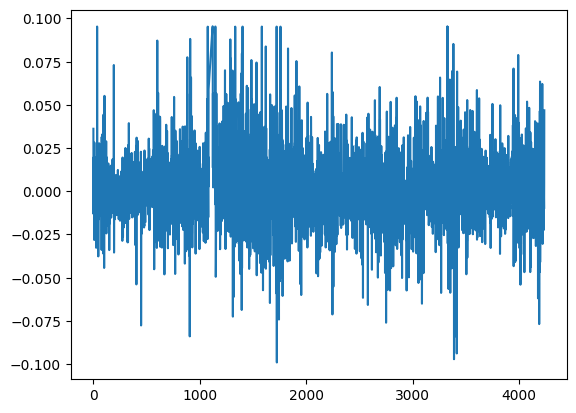

In [421]:
mao_tai['return'] = np.log(mao_tai['price'])-np.log(mao_tai['price'].shift(periods=1))
mao_tai.dropna(axis=0,inplace=True,how='any')
mao_tai = mao_tai.loc[(mao_tai['return']>=-0.1) & (mao_tai['return'] <=0.1)]
mao_tai.dropna(axis=0,how='any',inplace=True)
mao_tai['return'].plot(),mao_tai

(<Axes: >,
             date    price    return
 1       2005/1/5   992.56  0.009892
 2       2005/1/6   983.17 -0.009505
 3       2005/1/7   983.96  0.000803
 4      2005/1/10   993.88  0.010031
 5      2005/1/11   997.13  0.003265
 ...          ...      ...       ...
 3397  2018/12/24  3038.20  0.002901
 3398  2018/12/25  3017.28 -0.006909
 3399  2018/12/26  3002.03 -0.005067
 3400  2018/12/27  2990.51 -0.003845
 3401  2018/12/28  3010.65  0.006712
 
 [3401 rows x 3 columns])

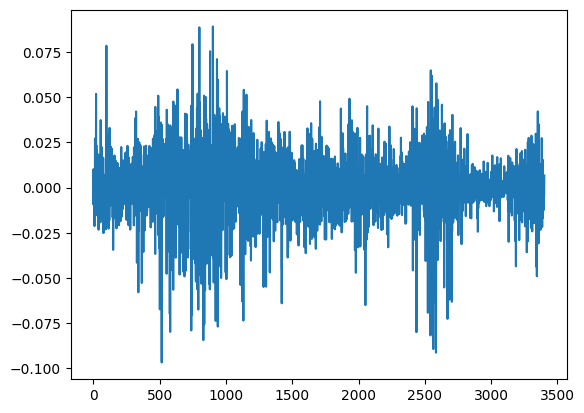

In [422]:
husheng300 = pd.read_csv("./data/1EShowData_data_Index_daily_price_2001-2018.csv",encoding="gbk")
husheng300 = husheng300[['交易日期_TrdDt','收盘价(元/点)_ClPr']]
husheng300.columns = ['date','price']
husheng300.dropna(axis=0,inplace=True,how='any')
husheng300['return'] = np.log(husheng300['price'])-np.log(husheng300['price'].shift(1))
husheng300.dropna(axis=0,how='any',inplace=True)
husheng300 = husheng300.loc[(husheng300['return']>=-0.1) & (husheng300['return']<=0.1)]
husheng300['return'].plot(),husheng300

In [423]:
#内连接，日期相同的连接
data = pd.merge(mao_tai[['date','rf','return']],husheng300[['date','return']],on='date',how='inner')
data.columns = ['date','rf','maotai','husheng300']
data

,date,rf,maotai,husheng300
0,2005/1/5,0.000073,0.021442,0.009892
1,2005/1/6,0.000071,-0.017335,-0.009505
2,2005/1/7,0.000071,0.008163,0.000803
3,2005/1/10,0.000071,0.035932,0.010031
4,2005/1/11,0.000071,0.001306,0.003265
...,...,...,...,...
3321,2018/12/24,0.000088,0.001039,0.002901
3322,2018/12/25,0.000090,-0.003898,-0.006909
3323,2018/12/26,0.000091,-0.010143,-0.005067
3324,2018/12/27,0.000091,0.005200,-0.003845


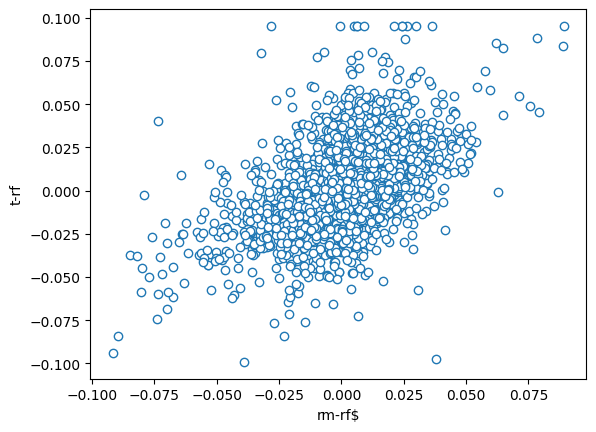

In [424]:
maotai_return = data['maotai']
rf_return = data['rf']
husheng300_return = data['husheng300']
plt.plot(husheng300_return-rf_return,maotai_return-rf_return,'o',mfc='w')
plt.xlabel("rm-rf$")
plt.ylabel("t-rf")
plt.show()

In [425]:
#给x添加常数项
x = sm.add_constant(husheng300_return-rf_return)
y = maotai_return-rf_return
model = sm.OLS(y,x)
reuslts = model.fit()
reuslts.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.248
Model:                            OLS   Adj. R-squared:                  0.248
Method:                 Least Squares   F-statistic:                     1097.
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          3.53e-208
Time:                        19:18:33   Log-Likelihood:                 8498.5
No. Observations:                3326   AIC:                        -1.699e+04
Df Residuals:                    3324   BIC:                        -1.698e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0011      0.000      3.391      0.001       0.000       0.002
0              0.6159      0.019     33.125      0.000       0.579       0.652
==============================================================================
Omnibus:                      437.950   Durbin-Watson:                   1.838
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1855.618
Skew:                           0.583   Prob(JB):                         0.00
Kurtosis:                       6.468   Cond. No.                         57.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""